In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import ast
import seaborn as sns

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
job_place = 'United Kingdom'

df_uk = df[df['job_country'] == job_place].dropna(subset=['salary_year_avg']).copy()

job_titles = df_uk['job_title_short'].value_counts().index[:6].to_list()

df_uk_top6 = df_uk[df_uk['job_title_short'].isin(job_titles)]
job_order = df_uk_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

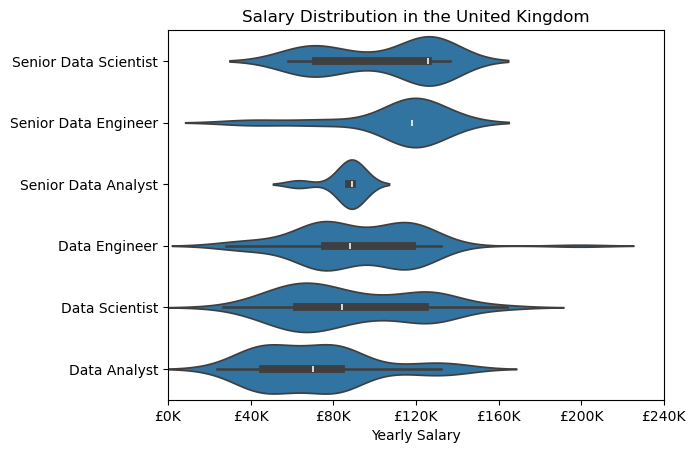

In [3]:
sns.violinplot(data=df_uk_top6, x='salary_year_avg', y='job_title_short', density_norm='width', order= job_order)
plt.title(f'Salary Distribution in the {job_place}')
plt.xlabel('Yearly Salary')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int((x*0.8)/1000)}K'))
plt.xlim(0, 300_000)
plt.show()


In [10]:
job_title = 'Data Analyst'
df_da_uk = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_place)].copy()
df_da_uk = df_da_uk.dropna(subset=['salary_year_avg'])
df_da_uk = df_da_uk.explode('job_skills')

In [54]:
df_da_top_pay = df_da_uk.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)
df_da_top_pay = df_da_top_pay.head(10)

In [46]:
df_da_skills = df_da_uk.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)
df_da_skills = df_da_skills.head(10).sort_values('median', ascending=False)
df_da_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


In [1]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
ax[0].set_title(f'Top 10 highest paying skills for {job_title}s in the {job_place}')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int((x*0.8)/1000)}K'))
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='dark:b_r', legend=False)

ax[1].set_title(f'Top 10 Most Wanted skills for {job_title}s in the {job_place}')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Yearly Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int((x*0.8)/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[1].tick_params(axis='y', labelsize=12)

fig.tight_layout()
plt.show()

NameError: name 'plt' is not defined